In [1]:
from Bagging import create_models, create_bags, evaluate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import random
from BaggingGAv2 import BaggingGAv2

seed = None
np.random.seed(seed)
random.seed(seed)
data = datasets.load_digits()
# data = datasets.load_breast_cancer()


X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [2]:
def evaluate_bagging_ga(n_trees):
    bagging_ga_v2 = BaggingGAv2(X=X_train, y=y_train,
                           n_trees=n_trees, max_iterations=200, mutation_rate=0.05,
                           crossover_rate=0.8, population_size=100)
    models = bagging_ga_v2.run(X_for_test=X_test, y_for_test=y_test, fun_monitor=fun_monitor)
    accuracy = evaluate(X_test, y_test, models=models)
    return accuracy, models


fit_acc_sum = {}
fitness = []

def fun_monitor(iteration, best_fitness, fitness_pointer, accuracy):
    print(f"Iteration {iteration}, Best fitness: {best_fitness:.3f}, Fitness: {fitness_pointer:.3f}, Accuracy: {accuracy:.3f}")
    if iteration not in fit_acc_sum:
        fit_acc_sum[fitness_pointer] = [accuracy]
    else:
        fit_acc_sum[fitness_pointer].append(accuracy)
    fitness.append([iteration, fitness_pointer, accuracy])

acc_ga, models = evaluate_bagging_ga(n_trees=5)
fitness_df = pd.DataFrame(fitness, columns=['Iteration', 'Fitness', 'Accuracy'])

print(f"BaggingGAv2: {acc_ga:.3f}")

Iteration 0, Best fitness: 0.528, Fitness: 0.528, Accuracy: 0.828
Iteration 1, Best fitness: 0.535, Fitness: 0.535, Accuracy: 0.756
Iteration 2, Best fitness: 0.538, Fitness: 0.538, Accuracy: 0.703
Iteration 3, Best fitness: 0.549, Fitness: 0.549, Accuracy: 0.742
Iteration 4, Best fitness: 0.549, Fitness: 0.549, Accuracy: 0.672
Iteration 5, Best fitness: 0.556, Fitness: 0.556, Accuracy: 0.722
Iteration 6, Best fitness: 0.556, Fitness: 0.556, Accuracy: 0.686
Iteration 7, Best fitness: 0.556, Fitness: 0.549, Accuracy: 0.750
Iteration 8, Best fitness: 0.556, Fitness: 0.552, Accuracy: 0.728
Iteration 9, Best fitness: 0.566, Fitness: 0.566, Accuracy: 0.694
Iteration 10, Best fitness: 0.566, Fitness: 0.559, Accuracy: 0.714
Iteration 11, Best fitness: 0.566, Fitness: 0.562, Accuracy: 0.728
Iteration 12, Best fitness: 0.580, Fitness: 0.580, Accuracy: 0.672
Iteration 13, Best fitness: 0.590, Fitness: 0.590, Accuracy: 0.675
Iteration 14, Best fitness: 0.601, Fitness: 0.601, Accuracy: 0.694
Itera

In [7]:
from Bagging import predict


for model in models:
    y_pred = predict(X_test, [model])
    acc = accuracy_score(y_test, y_pred)
    print(f"Model accuracy: {acc:.3f}")



Model accuracy: 0.647
Model accuracy: 0.639
Model accuracy: 0.608
Model accuracy: 0.639
Model accuracy: 0.656


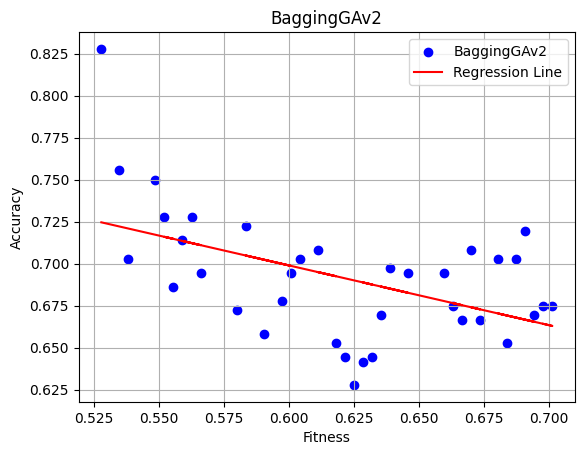

In [4]:
import matplotlib.pyplot as plt

X = np.array(list(fit_acc_sum.keys()))
Y = np.array([np.mean(fit_acc_sum[x]) for x in X])

coefficients = np.polyfit(X, Y, 1) 
regression_line = np.poly1d(coefficients)

Y_regression = regression_line(X)

plt.scatter(X, Y, label="BaggingGAv2", color="blue")
plt.plot(X, Y_regression, label="Regression Line", color="red")


plt.xlabel("Fitness")
plt.ylabel("Accuracy")
plt.title("BaggingGAv2")
plt.grid()
plt.legend()
plt.show()


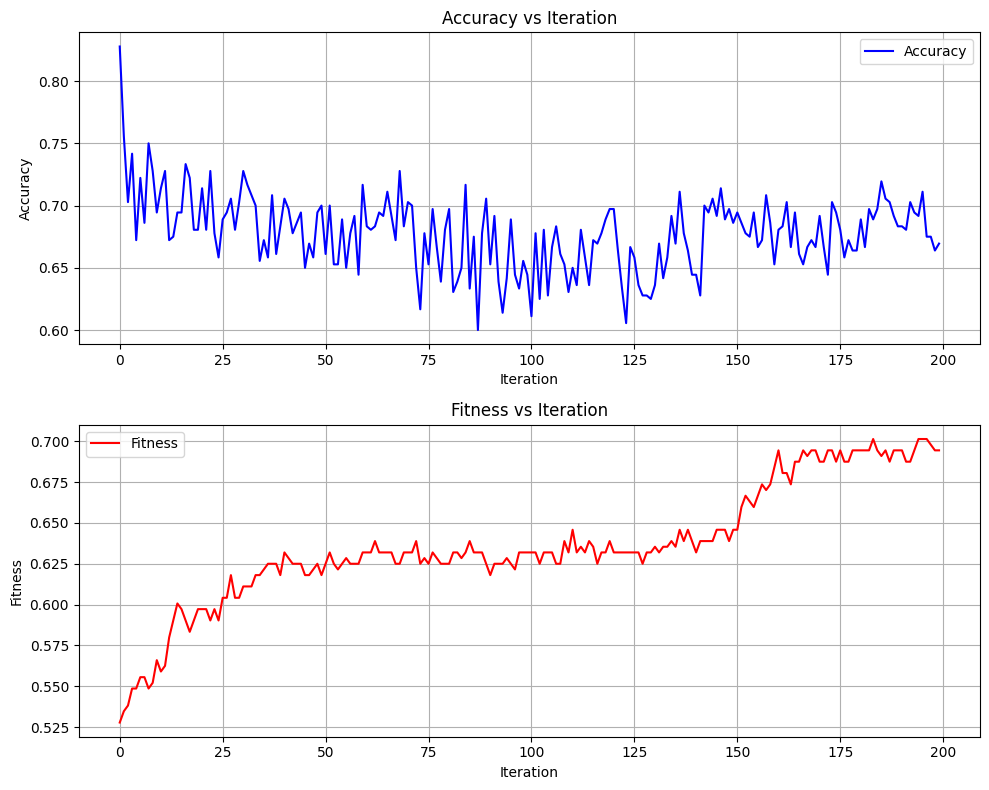

In [5]:
X = fitness_df['Iteration']
Y1 = fitness_df['Accuracy']
Y2 = fitness_df['Fitness']

fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].plot(X, Y1, label="Accuracy", color="blue")
axs[1].plot(X, Y2, label="Fitness", color="red")
axs[0].set_xlabel("Iteration")
axs[0].set_ylabel("Accuracy")
axs[1].set_xlabel("Iteration")
axs[1].set_ylabel("Fitness")
axs[0].set_title("Accuracy vs Iteration")
axs[1].set_title("Fitness vs Iteration")
axs[0].grid()   
axs[1].grid()
axs[0].legend()
axs[1].legend()
plt.tight_layout()
plt.show()